In [1]:
from __future__ import division
import math  
import os
import sys
import w2v_utils  as w2v_utils
import numpy as np
import gensim.models
from gensim.models.word2vec import Word2Vec
import simplejson as json
from gensim.models import word2vec
import matplotlib.pyplot as plt

# As usual, a bit of setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

#model = Word2Vec.load('TRAIN_MODEL')
model = Word2Vec.load('400dm_by_5lac_yelp.model')
#print "Loading GoogleNews-vectors-negative300.bin model" 
#model = Word2Vec.load_word2vec_format('/home/nouman/Python codes/ABSA_code/GoogleNews-vectors-negative300.bin', binary=True) 
#print "Model loaded..."

In [2]:
word1 = "shake"
word2 = "drinks"
model.most_similar(word1),"  -----------------------------  ",model.most_similar(word2)

([('milkshake', 0.6257020235061646),
  ('shakes', 0.524605929851532),
  ('loganberry', 0.5183275938034058),
  (u'oreo', 0.4959983825683594),
  ('nutella', 0.4868525564670563),
  ('krumble', 0.4713166058063507),
  ('peppermint', 0.46873319149017334),
  ('mcflurry', 0.46147316694259644),
  ('frap', 0.4589877128601074),
  ('oreos', 0.45650866627693176)],
 '  -----------------------------  ',
 [('drink', 0.6787455081939697),
  ('cocktails', 0.5642061233520508),
  ('beverages', 0.5136314630508423),
  ('waters', 0.49310779571533203),
  ('nonalcoholic', 0.47577911615371704),
  ('martinis', 0.4544762969017029),
  ('booze', 0.452788770198822),
  ('margaritas', 0.4479590058326721),
  ('pitchers', 0.4375550448894501),
  ('beverage', 0.4352796971797943)])

In [3]:
chunkSize = [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99]
filename = "results_3.csv"

def vectorize(word):
    word = model[word].reshape((1, model.layer1_size))
    return word[0]

def modelSimilarity(word1, word2):
    return model.similarity(word1,word2)

def similarWords(word): 
    return model.most_similar(word)

word_one_list = similarWords(word1)
word_two_list = similarWords(word2)

##Result Lists
first_nVec = []
last_nVec  = []
rand_nVec  = []
meanVec    = []
avgWord    = []
    
for i in chunkSize:
    actlCosAngle_list    = []
    firstnCosAngle_list  = []
    lastnCosAngle_list   = []
    randCosAngle_list    = []
    meanCosAngle_list    = []
    avgWordCosAngle_list = []
    
    chunk = i
    open(filename, 'w').close()
    with open(filename, "a") as myfile:
        myfile.write("word\t closest_word\t actual_dim\t actual_sim\t redu_dim\t Firstn_method_1\t Lastn_method_1\t Rand_method_2\t avgWordMethod\t Mean_method_3\t\n")

        for i in range(len(word_one_list)):  
            #print "(",word_one_list[i][0],")"," and ","(",word1,")"
            vector1 = vectorize(word1)
            vector2 = vectorize(word_one_list[i][0])

            actlCosAngle, firstnCosAngle,lastnCosAngle, randCosAngle, meanCosAngle  = w2v_utils.stats(vector1, vector2, chunk)
            avgWordCosAngle = w2v_utils.avgWordVector(vector1, vector2, chunk)

            actlCosAngle_list.append(actlCosAngle)
            firstnCosAngle_list.append(firstnCosAngle)
            lastnCosAngle_list.append(lastnCosAngle)
            randCosAngle_list.append(randCosAngle)
            meanCosAngle_list.append(meanCosAngle)
            avgWordCosAngle_list.append(avgWordCosAngle)

            string = (word1+"\t"+word_one_list[i][0]+"\t"+`vector1.size`+"\t"+`actlCosAngle`+"\t"
                         +`chunk*vector1.size`+"\t"
                         +`firstnCosAngle`+"\t"
                         +`lastnCosAngle`+"\t"
                         +`randCosAngle`+"\t"
                         +`avgWordCosAngle`+"\t"
                         +`meanCosAngle`+"\n")

            myfile.write(string)

        for i in range(len(word_two_list)):  
            #print "(",word_two_list[i][0],")"," and ","(",word2,")"
            vector1 = vectorize(word2)
            vector2 = vectorize(word_two_list[i][0])

            actlCosAngle, firstnCosAngle,lastnCosAngle, randCosAngle, meanCosAngle  = w2v_utils.stats(vector1, vector2, chunk)
            avgWordCosAngle = w2v_utils.avgWordVector(vector1, vector2, chunk)

            actlCosAngle_list.append(actlCosAngle)
            firstnCosAngle_list.append(firstnCosAngle)
            lastnCosAngle_list.append(lastnCosAngle)
            randCosAngle_list.append(randCosAngle)
            meanCosAngle_list.append(meanCosAngle)
            avgWordCosAngle_list.append(avgWordCosAngle)

            string = (word2+"\t"+word_two_list[i][0]+"\t"+`vector1.size`+"\t"+`actlCosAngle`+"\t"
                         +`chunk*vector1.size`+"\t"
                         +`firstnCosAngle`+"\t"
                         +`lastnCosAngle`+"\t"
                         +`randCosAngle`+"\t"
                         +`avgWordCosAngle`+"\t"
                         +`meanCosAngle`+"\n")
            myfile.write(string)

        for i in range(len(word_two_list)):  
            #print "(",word_one_list[i][0],")"," and ","(",word_two_list[i][0],")"
            vector1 = vectorize(word_one_list[i][0])
            vector2 = vectorize(word_two_list[i][0])

            actlCosAngle, firstnCosAngle,lastnCosAngle, randCosAngle, meanCosAngle  = w2v_utils.stats(vector1, vector2, chunk)
            avgWordCosAngle = w2v_utils.avgWordVector(vector1, vector2, chunk)

            actlCosAngle_list.append(actlCosAngle)
            firstnCosAngle_list.append(firstnCosAngle)
            lastnCosAngle_list.append(lastnCosAngle)
            randCosAngle_list.append(randCosAngle)
            meanCosAngle_list.append(meanCosAngle)
            avgWordCosAngle_list.append(avgWordCosAngle)

            string = (word_one_list[i][0]+"\t"+word_two_list[i][0]+"\t"+`vector1.size`+"\t"+`actlCosAngle`+"\t"
                         +`chunk*vector1.size`+"\t"
                         +`firstnCosAngle`+"\t"
                         +`lastnCosAngle`+"\t"
                         +`randCosAngle`+"\t"
                         +`avgWordCosAngle`+"\t"
                         +`meanCosAngle`+"\n")
            myfile.write(string)
            
        first_nVec.append(1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(firstnCosAngle_list)))
        last_nVec.append(1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(lastnCosAngle_list)))
        rand_nVec.append(1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(randCosAngle_list)))
        meanVec.append(1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(meanCosAngle_list)))
        avgWord.append(1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(avgWordCosAngle_list)))
        
#print first_nVec[0]
#print last_nVec[0]
#print rand_nVec[0]
#print meanVec[0]
#print avgWord[0]
#print "\nCurve Similarity : "
#print "1 firstnCosAngle",    1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(firstnCosAngle_list))
#print "2 lastnCosAngle",     1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(lastnCosAngle_list))
#print "3 randCosAngle",      1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(randCosAngle_list))
#print "4 meanCosAngle",      1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(meanCosAngle_list))
#print "5 avgWordCosAngle: ", 1-plt.mlab.dist(np.array(actlCosAngle_list),np.array(avgWordCosAngle_list))

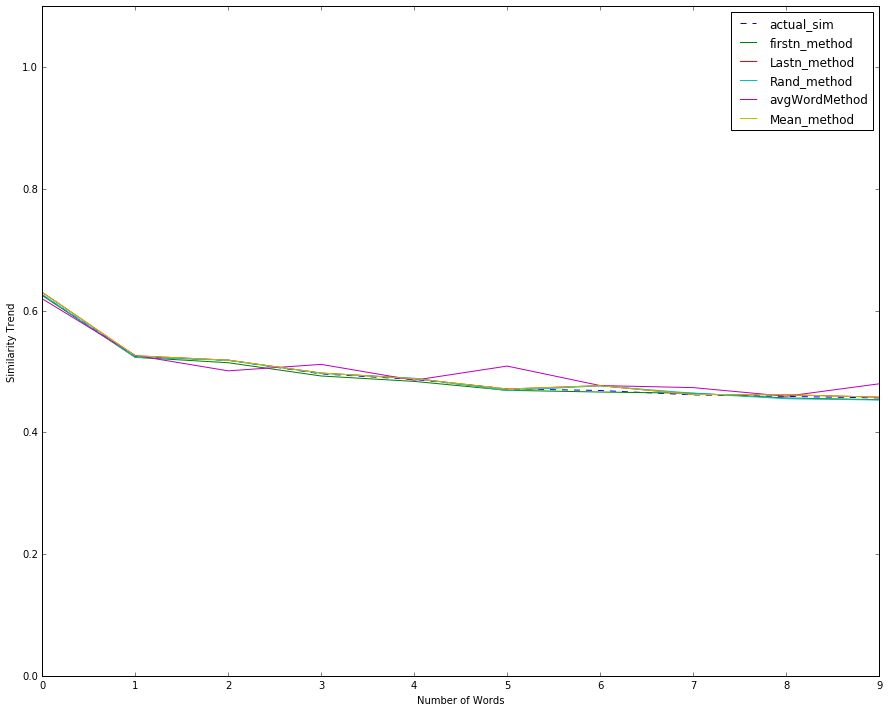

In [4]:
plt.ylim([0.0,1.1])
plt.plot(actlCosAngle_list[:10],'--')
plt.plot(firstnCosAngle_list[:10])
plt.plot(lastnCosAngle_list[:10])
plt.plot(randCosAngle_list[:10])
plt.plot(meanCosAngle_list[:10])
plt.plot(avgWordCosAngle_list[:10])

plt.legend(['actual_sim', 'firstn_method','Lastn_method','Rand_method','avgWordMethod','Mean_method'], loc='best')
plt.xlabel('Number of Words')
plt.ylabel('Similarity Trend')

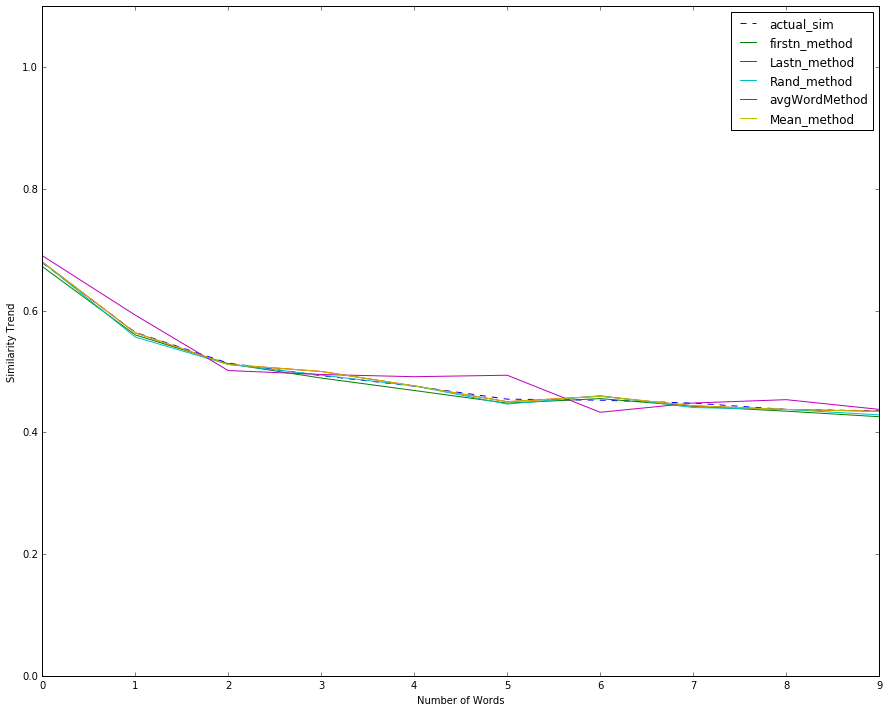

In [5]:
plt.ylim([0.0,1.1])
plt.plot(actlCosAngle_list[10:20],'--')
plt.plot(firstnCosAngle_list[10:20])
plt.plot(lastnCosAngle_list[10:20])
plt.plot(randCosAngle_list[10:20])
plt.plot(meanCosAngle_list[10:20])
plt.plot(avgWordCosAngle_list[10:20])

plt.legend(['actual_sim', 'firstn_method','Lastn_method','Rand_method','avgWordMethod','Mean_method'], loc='best')
plt.xlabel('Number of Words')
plt.ylabel('Similarity Trend')

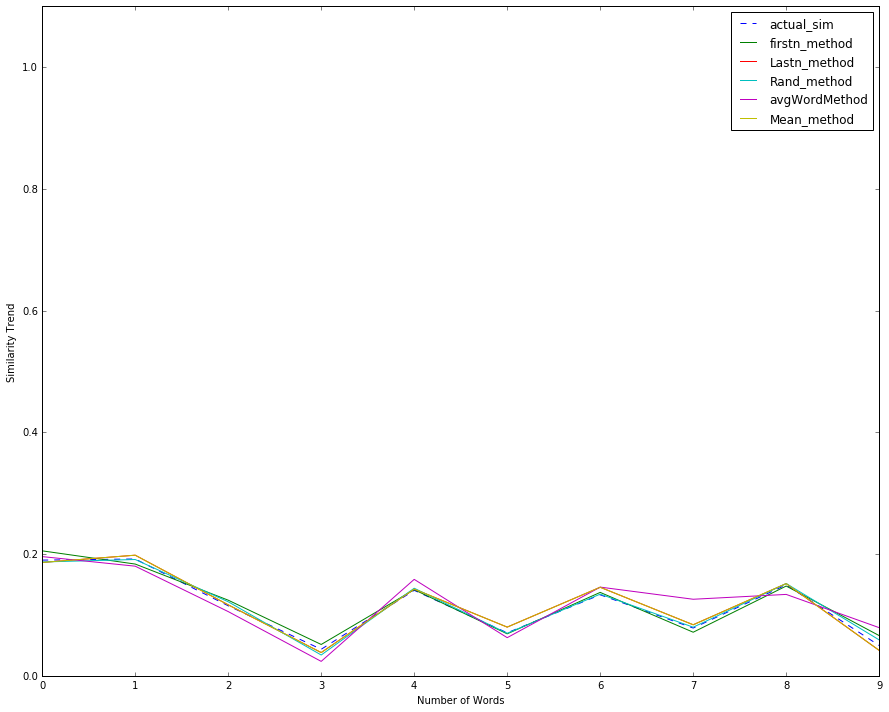

In [6]:
plt.ylim([0.0,1.1])
plt.plot(actlCosAngle_list[20:30],'--')
plt.plot(firstnCosAngle_list[20:30])
plt.plot(lastnCosAngle_list[20:30])
plt.plot(randCosAngle_list[20:30])
plt.plot(meanCosAngle_list[20:30])
plt.plot(avgWordCosAngle_list[20:30])

plt.legend(['actual_sim', 'firstn_method','Lastn_method','Rand_method','avgWordMethod','Mean_method'], loc='best')
plt.xlabel('Number of Words')
plt.ylabel('Similarity Trend')

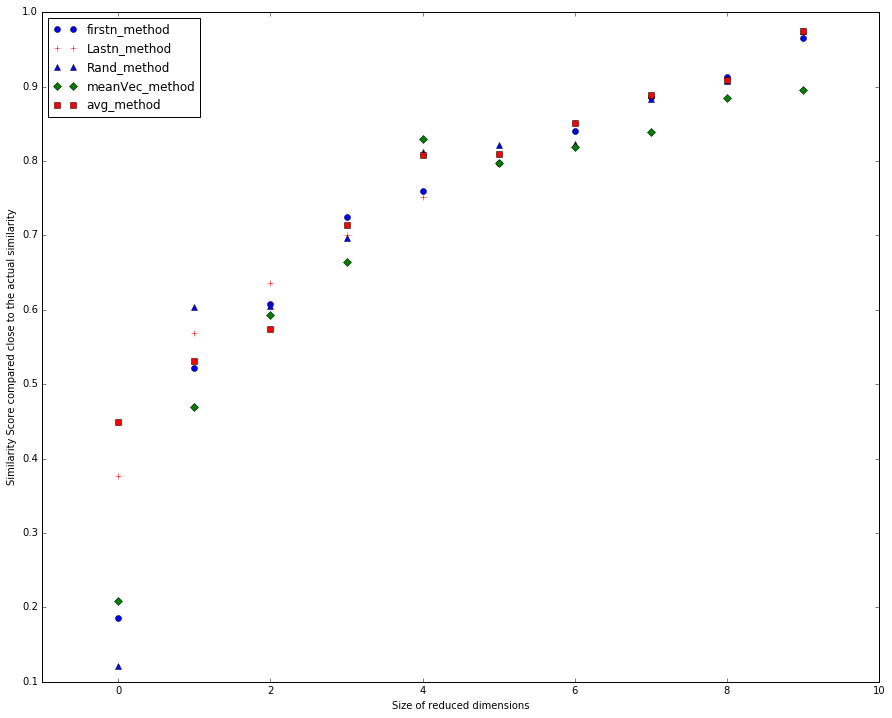

In [7]:
#plt.rcParams['figure.figsize'] = (14.0, 8.0)

plt.plot(first_nVec, 'bo')
plt.plot(last_nVec, 'r+')
plt.plot(rand_nVec, '^')
plt.plot(meanVec, 'D')
plt.plot(avgWord, 's')

plt.xlim([-1,10])

plt.legend([ 'firstn_method','Lastn_method','Rand_method','meanVec_method','avg_method'], loc='best')
plt.xlabel('Size of reduced dimensions')
plt.ylabel('Similarity Score compared close to the actual similarity')

# Average Best Results of Vector Reduction methods accorss sizes [0.1-0.9]

In [8]:
print "First_n:   ",sum(first_nVec)/10
print "last_nVec: ",sum(last_nVec)/10
print "rand_nVec: ",sum(rand_nVec)/10
print "meanVec:   ",sum(meanVec)/10
print "avgWord:   ",sum(avgWord)/10

First_n:    0.720207585022
last_nVec:  0.74653744176
rand_nVec:  0.724992045388
meanVec:    0.70004664287
avgWord:    0.751067089039


In [9]:
import math

######## getting sentence vectors
print "Process of word to vector conversion initiated!"
maxiSenLength = 2000
getWordChunks = 0

#Build word vector for training set by using the average value of all word vectors in the tweet, then scale
def buildWordVector(text, size, debug = False):
    if (len(text) == 0):
        return np.array((np.zeros(maxiSenLength).reshape(1, maxiSenLength)))
    
    getWordChunks = math.ceil(maxiSenLength/len(text))
    chunkPercent  = getWordChunks/size
    
    count=0
    sentVec= []
    for word in text:
        #obtaining word vectors
        try:
            wordVector = model[word].reshape((size))
            wordVector = np.array((w2v_utils.meanVec_two(wordVector, chunkPercent)))

        except KeyError:
            wordVector = np.array((np.zeros(getWordChunks)))
        
        if count != 0:
            sentVec = np.hstack((sentVec,wordVector))
        else:
            sentVec = wordVector
            
        count = count+1
            
    if len(sentVec)>maxiSenLength:
        sentVec = sentVec[:len(sentVec)-(len(sentVec)-maxiSenLength)]  
    elif len(sentVec)<maxiSenLength: 
        diff = (maxiSenLength-len(sentVec))
        sen  = np.zeros([maxiSenLength])
        sen[:len(sentVec)] = sentVec[:len(sentVec)]
        sen[len(sentVec):] = np.zeros([diff])
        sentVec = sen
    return sentVec.reshape(1 , maxiSenLength)

buildWordVector(["'ve", 'tried', 'always', 'packed', "n't", 'take', 'reservations'], model.layer1_size, debug = False).shape

Process of word to vector conversion initiated!


(1, 2000)